In [1]:
pip install tensorflow

In [2]:
# a)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Učitavanje CIFAR-10 skupa podataka
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Ispis oblika (shape) podataka
print("Trening podaci shape:", x_train.shape)
print("Trening labele shape:", y_train.shape)
print("Test podaci shape:", x_test.shape)
print("Test labele shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Trening podaci shape: (50000, 32, 32, 3)
Trening labele shape: (50000, 1)
Test podaci shape: (10000, 32, 32, 3)
Test labele shape: (10000, 1)


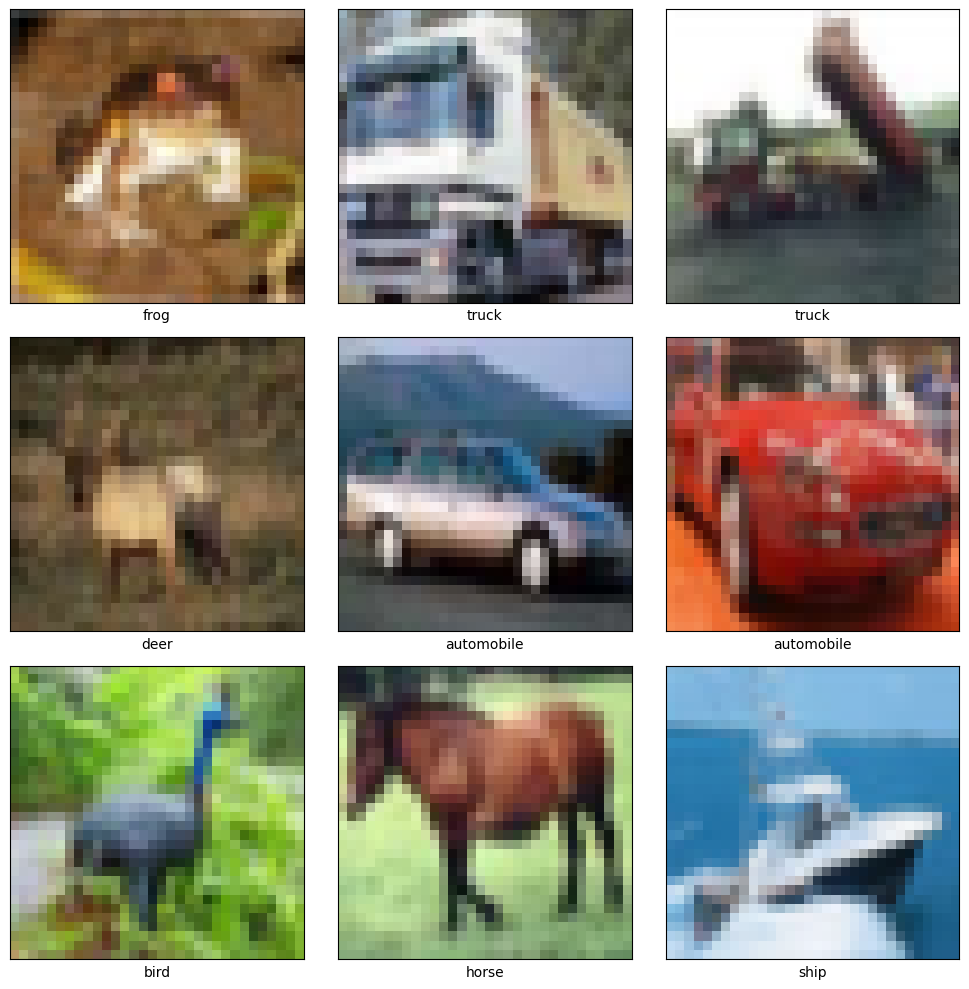

In [3]:
# b)
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Učitavanje podataka
(x_train, y_train), (_, _) = cifar10.load_data()

# Nazivi klasa
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Iscrtavanje prvih 9 slika
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

# Odgovori:
# Slike su niske rezolucije. Svaka CIFAR-10 slika ima rezoluciju 32x32 piksela, što je izuzetno niska rezolucija u poređenju s
# modernim fotografijama koje često imaju 1920x1080 (Full HD) ili više.
# Slike ovakve (niske rezolucije) dovode do gubitka detalja, jer male slike ne sadrze fine detalje. Ovo moze dovesti do npr mijesanja
# životinja tj da algoritam kaže da je na slici mačka, a ustvari je pas.

In [4]:
# c) predprocesiranje podataka (one-hot enkodiranje) te priprema podataka za treniranje
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Učitavanje CIFAR-10 podataka
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Pretvaranje piksela u float32 i skaliranje između 0 i 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot enkodiranje labela
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Provjera oblika nakon enkodiranja
print("x_train shape:", x_train.shape)
print("y_train shape (one-hot):", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape (one-hot):", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape (one-hot): (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape (one-hot): (10000, 10)


In [5]:
# d) pomocna funkcija za definisanje modela
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [6]:
# e)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()

    # Prvi konvolucijski blok
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Drugi konvolucijski blok
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Klasifikacijski slojevi
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # dodan SGD optimizator kao sto se trežilo, te kompajliran model
    # Definisanje SGD optimizatora
    opt = SGD(learning_rate=0.001, momentum=0.9)

    # Kompajliranje modela
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = define_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# f)
# Kreiranje modela
model = define_model()

# Treniranje modela
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluacija modela
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Testna tačnost: {accuracy * 100:.2f}%")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1883 - loss: 2.1844 - val_accuracy: 0.3429 - val_loss: 1.8388
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3755 - loss: 1.7602 - val_accuracy: 0.4242 - val_loss: 1.5883
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4561 - loss: 1.5222 - val_accuracy: 0.4846 - val_loss: 1.4371
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5051 - loss: 1.3887 - val_accuracy: 0.5232 - val_loss: 1.3545
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5355 - loss: 1.3023 - val_accuracy: 0.5433 - val_loss: 1.2843
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5669 - loss: 1.2207 - val_accuracy: 0.5523 - val_loss: 1.2484
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5960 - loss: 1.1493 - val_accuracy: 0.5796 - val_loss: 1.2025
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6175 - loss: 1.0872 - val_accuracy:

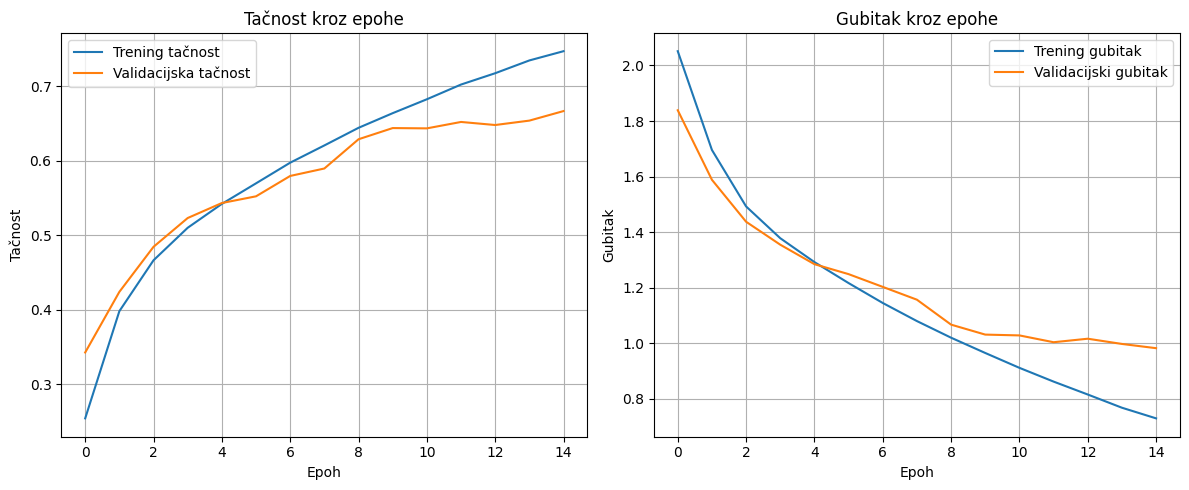

In [8]:
# g)
import matplotlib.pyplot as plt

# Crtanje tačnosti
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trening tačnost')
plt.plot(history.history['val_accuracy'], label='Validacijska tačnost')
plt.title('Tačnost kroz epohe')
plt.xlabel('Epoh')
plt.ylabel('Tačnost')
plt.legend()
plt.grid(True)

# Crtanje gubitka
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trening gubitak')
plt.plot(history.history['val_loss'], label='Validacijski gubitak')
plt.title('Gubitak kroz epohe')
plt.xlabel('Epoh')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1514 - loss: 2.2410 - val_accuracy: 0.3058 - val_loss: 1.9474
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3227 - loss: 1.8817 - val_accuracy: 0.4190 - val_loss: 1.6247
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4007 - loss: 1.6610 - val_accuracy: 0.4680 - val_loss: 1.4894
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4494 - loss: 1.5254 - val_accuracy: 0.4996 - val_loss: 1.3863
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4789 - loss: 1.4370 - val_accuracy: 0.5269 - val_loss: 1.3221
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5056 - loss: 1.3759 - val_accuracy: 0.5415 - val_loss: 1.3092
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5303 - loss: 1.3123 - val_accuracy: 0.5567 - val_loss: 1.2427
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5486 - loss: 1.2672 - val_accuracy: 

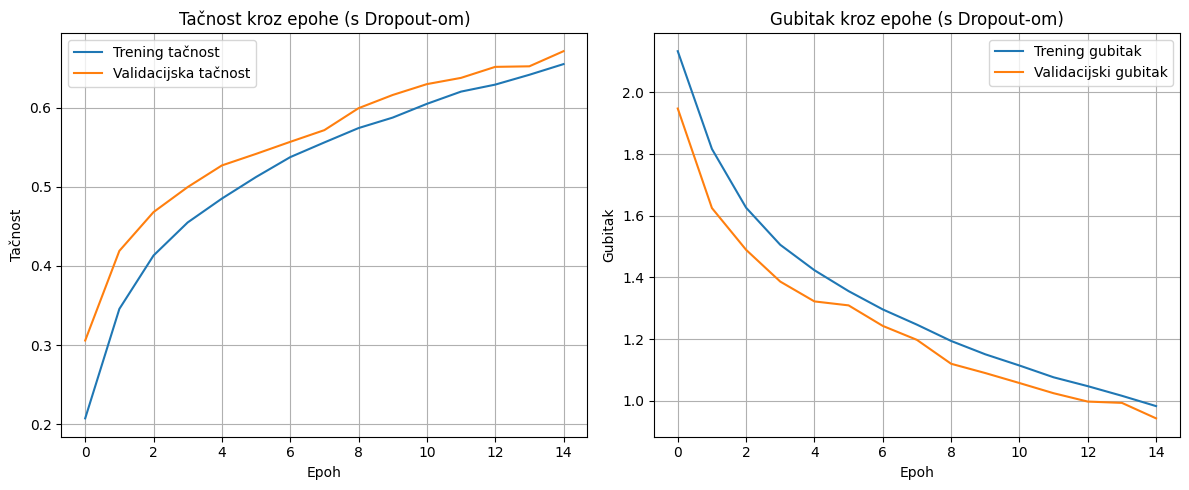

In [9]:
# h) Izmjena funkcije define_model() sa Dropout slojem
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.5))  # Dodan Dropout sloj
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Ponovno treniranje i evaluacija
model = define_model()

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Testna tačnost s Dropout slojem: {accuracy * 100:.2f}%")

# Plot tačnosti i gubitka (isti kod kao prije)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trening tačnost')
plt.plot(history.history['val_accuracy'], label='Validacijska tačnost')
plt.title('Tačnost kroz epohe (s Dropout-om)')
plt.xlabel('Epoh')
plt.ylabel('Tačnost')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trening gubitak')
plt.plot(history.history['val_loss'], label='Validacijski gubitak')
plt.title('Gubitak kroz epohe (s Dropout-om)')
plt.xlabel('Epoh')
plt.ylabel('Gubitak')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.1150 - loss: 2.2939 - val_accuracy: 0.2103 - val_loss: 2.1710
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2299 - loss: 2.1157 - val_accuracy: 0.3199 - val_loss: 1.9092
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3115 - loss: 1.8891 - val_accuracy: 0.3664 - val_loss: 1.7886
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3760 - loss: 1.7137 - val_accuracy: 0.4370 - val_loss: 1.5724
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4081 - loss: 1.6312 - val_accuracy: 0.4657 - val_loss: 1.4728
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4386 - loss: 1.5403 - val_accuracy: 0.4932 - val_loss: 1.3992
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4645 - loss: 1.4766 - val_accuracy: 0.5170 - val_loss: 1.3421
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4872 - loss: 1.4207 - val_accuracy

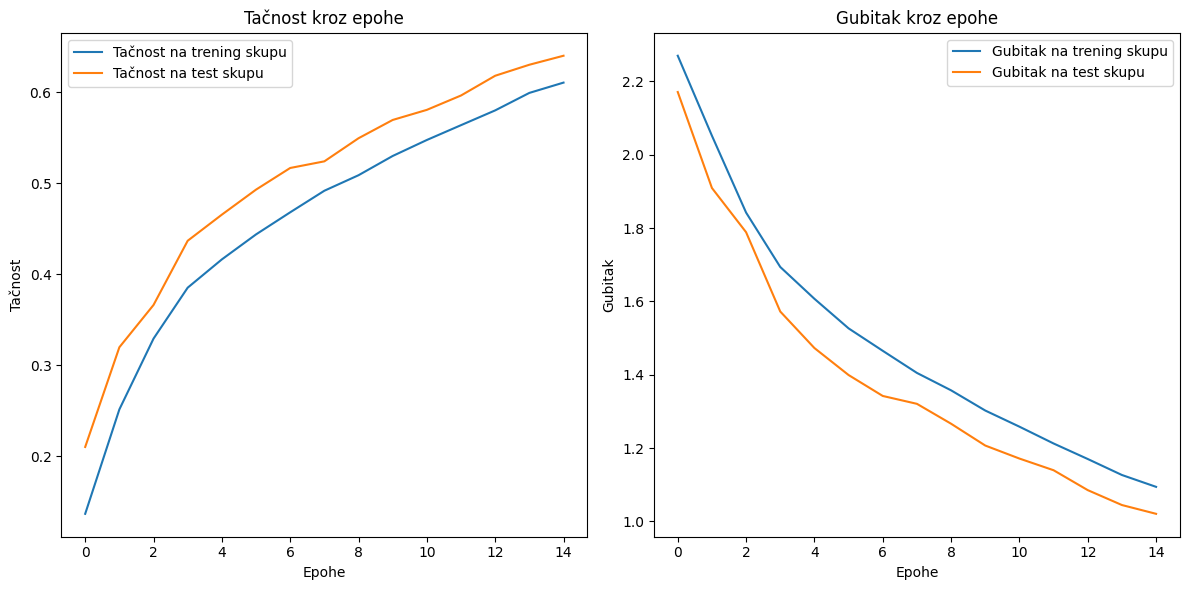

In [10]:
# i)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()

    # Prvi blok
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Dropout nakon MaxPooling

    # Drugi blok
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Dropout nakon MaxPooling

    # Treći blok – NOVI
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Dropout nakon MaxPooling

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))  # Premješteni Dropout

    model.add(Dense(10, activation='softmax'))

    # Optimizator i kompilacija
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Isti kod za treniranje, evaluaciju i plotanje kao ranije
model = define_model()

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Testna tačnost s finalnim modelom: {accuracy * 100:.2f}%")

# Plotanje tačnosti kroz epohe
plt.figure(figsize=(12, 6))

# Tačnost tokom treniranja i validacije
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Tačnost na trening skupu')
plt.plot(history.history['val_accuracy'], label='Tačnost na test skupu')
plt.title('Tačnost kroz epohe')
plt.xlabel('Epohе')
plt.ylabel('Tačnost')
plt.legend()

# Gubitak tokom treniranja i validacije
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Gubitak na trening skupu')
plt.plot(history.history['val_loss'], label='Gubitak na test skupu')
plt.title('Gubitak kroz epohe')
plt.xlabel('Epohе')
plt.ylabel('Gubitak')
plt.legend()

plt.tight_layout()
plt.show()